# **Koch Snowflake**

Check if ImageMagick is installed to enable GIF creation.

In [71]:
# Install ImageMagick
!apt-get update
!apt-get install -y imagemagick

# Verify ImageMagick installation
!convert -version

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

Check fot the Animation writers

In [32]:
import matplotlib.animation as animation
print(animation.writers.list())

['pillow', 'ffmpeg', 'ffmpeg_file', 'imagemagick', 'imagemagick_file', 'html']


Packages needed

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

Main code

Note that the rotation matrix moves in clockwise sense

In [79]:
def koch_snowflake(order, scale=10):
  """
  Generates the points for a Koch snowflake fractal.

  Parameters:
  - order: Number of iterations to refine the snowflake.
  - scale: Size of the initial equilateral triangle.

  Returns:
  - Points of the Koch snowflake after the given number of iterations.
  """

  # Start with an equilateral triangle
  points = create_triangle(scale)

  # Define the angle (60 degrees for Koch snowflake)
  angle = np.pi / 3
  # Rotation matrix in a clockwise direction
  rotation_matrix = np.array([[np.cos(angle), np.sin(angle)],
                              [-np.sin(angle), np.cos(angle)]])

  # Apply the Koch iteration up to order
  for _ in range(order):
    points = koch_iteration(points, rotation_matrix)

  return points

Create Initial Triangle

In [49]:
def create_triangle(scale):
  """
  Creates an equilateral triangle given the scale.

  Parameters:
  - scale: The side length of the equilateral triangle.

  Returns:
  - A triangle.
  """

  # Creates an equilateral triangle of the given scale
  height = np.sqrt(3) / 2 * scale
  return np.array([[0, 0], [scale, 0], [scale / 2, height], [0, 0]])

Create iteratively algorithm

In [50]:
def koch_iteration(points, rotation_matrix):
  """
  Perform one iteration of the Koch snowflake.

  Parameters:
  - points: The current set of points representing the snowflake.
  - rotation_matrix: The rotation matrix to rotate the points by 60 degrees.

  Returns:
  - All the points of the order
  """

  # Compute the difference between consecutive points
  delta = points[1:] - points[:-1]

  # Compute the new points
  p1 = points[:-1]
  p2 = p1 + delta / 3
  p3 = p2 + np.einsum('ij,kj->ki', rotation_matrix, delta / 3)
  p4 = p1 + 2 * delta / 3

  # Stack all the points together
  new_points = np.column_stack([p1, p2, p3, p4]).reshape(-1, 2)

  # Append the final point to close the shape
  new_points = np.vstack([new_points, points[-1]])

  return new_points

Create te plot

In [63]:
def plot_snowflake(order):

  """
  Plot a Koch snowflake fractal with a given order of iteration.

  Parameters:
  - order: Number of iterations to generate the snowflake.
  """

  # Generate Koch snowflake points
  points = koch_snowflake(order)

  # Plot the Koch snowflake
  plt.figure(figsize=(10, 10))
  plt.plot(points[:, 0], points[:, 1], 'b-')
  plt.fill(points[:, 0], points[:, 1], 'cyan', alpha=0.3)  # Optional: fill the shape
  plt.axis('equal')
  plt.show()


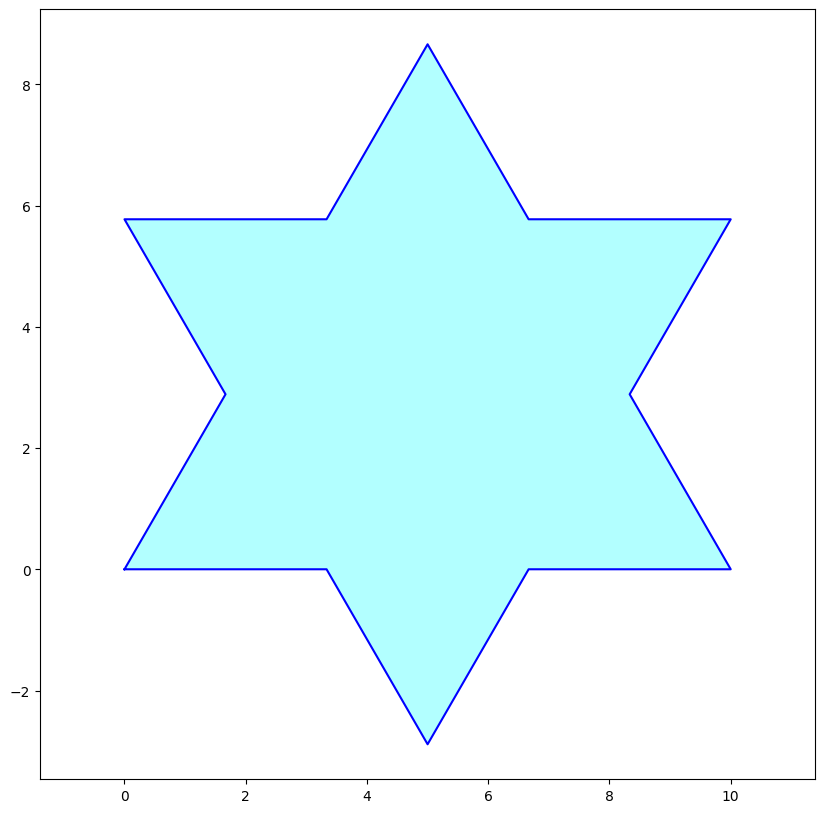

In [80]:
plot_snowflake(1)

Create the GIF

In [99]:
# Create the plot for the animation
def init_plot():
    """
    Initializes the plot for the Koch snowflake animation.

    """

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim([0, 10])
    ax.set_ylim([-4, 9])
    ax.set_aspect('equal')
    ax.axis('off')

    # Line object for animation
    line, = ax.plot([], [], 'steelblue')

    # Title text for animation
    title_text = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center', va='center')

    return fig, ax, line, title_text

In [106]:
def update_plot(i, ax, line, title_text, scale):
    """
    Updates the plot for the Koch snowflake animation.

    """
    # Generate the points for the Koch snowflake at order i
    points = koch_snowflake(i, scale)

    # Update the plot data
    line.set_data(points[:, 0], points[:, 1])

    # Fill the snowflake
    ax.fill(points[:, 0], points[:, 1], 'skyblue')

    # Update title text
    title_text.set_text(f"Koch Snowflake - Order {i}")

    return line, title_text

In [108]:
# Create the animation
def create_animation():
   """
    Creates an animation of the Koch snowflake fractal.

  """

    fig, ax, line, title_text = init_plot()

    # Create the animation object
    ani = FuncAnimation(fig, update_plot, frames=8, fargs=(ax, line, title_text, 10),
                        interval=1000, repeat=False)

    return ani

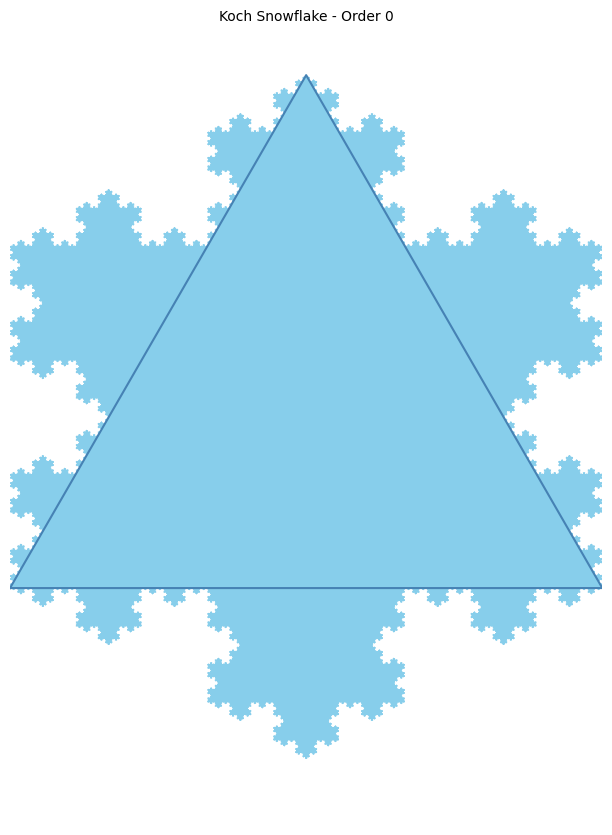

In [109]:
# Save the animation as GIF
ani = create_animation()
ani.save('koch_snowflake.gif', writer='imagemagick', fps=1)